In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ganti dengan path file Anda
file_path = 'online_retail_II.xlsx'

# Muat data dari Excel
df = pd.read_excel(file_path)

# Lihat informasi dataset
print(df.info())
print(df.head())

df = df.dropna()

df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
df['TotalSales'] = df['Quantity'] * df['Price']
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041    

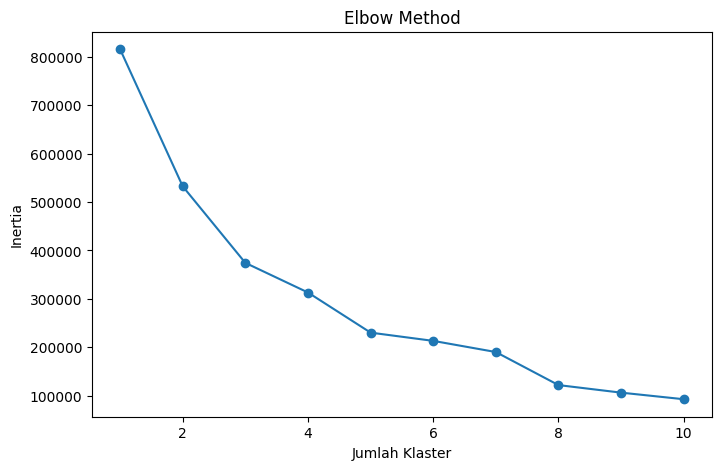

In [4]:
clustering_features = df[['Quantity', 'TotalSales']]

# Standardisasi fitur agar memiliki skala yang seragam
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.show()

In [12]:
optimal_k = 3  # Ganti dengan jumlah klaster optimal berdasarkan elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

In [13]:
print(df['Cluster'].value_counts())

Cluster
0    406284
2      1319
1        61
Name: count, dtype: int64


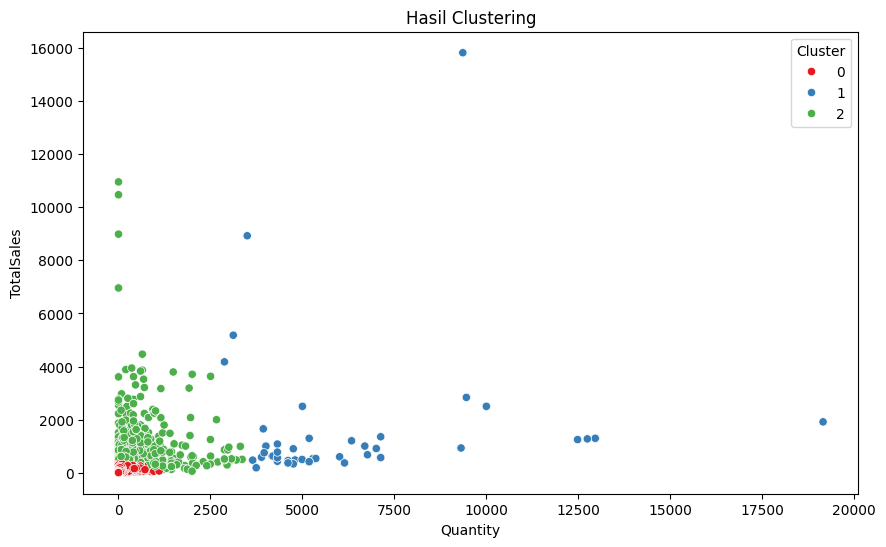

TypeError: agg function failed [how->mean,dtype->object]

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='TotalSales', hue='Cluster', palette='Set1')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['TotalSales'] = pd.to_numeric(df['TotalSales'], errors='coerce')
plt.title('Hasil Clustering')
plt.xlabel('Quantity')
plt.ylabel('TotalSales')
plt.legend(title='Cluster')
plt.show()

print(df.groupby('Cluster').mean())

In [15]:
df.to_excel('Clustering_Results.xlsx', index=False)